### JanataHack: HR Analytics
Challenge Date & Time: 08-05-2020 11:59 PM to 10-05-2020 11:59 PM

Public Leader board Name - Bala Iyappa

Link for leaderboard- https://datahack.analyticsvidhya.com/contest/janatahack-hr-analytics/#LeaderBoard

### Importing the required libraries.

In [2]:
#import required liberies
import pandas as pd
import numpy as np                 # For mathematical calculations 
import seaborn as sns              # For data visualization 
import matplotlib.pyplot as plt    # For plotting graphs 
%matplotlib inline 
import warnings                    # To ignore any warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn import preprocessing

In [3]:
# set global configrations
pd.options.display.max_columns=None

In [4]:
#import data
train = pd.read_csv('C:/Users/SiviSoft/Desktop/Bala/AV/HR Analytics/train.csv', header=0)

### Data Preprocessing

In [5]:
train['gender'].fillna(train['gender'].mode()[0], inplace=True) 
train['enrolled_university'].fillna(train['enrolled_university'].mode()[0], inplace=True)
train['education_level'].fillna(train['education_level'].mode()[0], inplace=True)
train['major_discipline'].fillna(train['major_discipline'].mode()[0], inplace=True)
train['experience'].fillna(train['experience'].mode()[0], inplace=True)
train['company_size'].fillna(train['company_size'].mode()[0], inplace=True)
train['company_type'].fillna(train['company_type'].mode()[0], inplace=True)
train['last_new_job'].fillna(train['last_new_job'].mode()[0], inplace=True)



In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18359 entries, 0 to 18358
Data columns (total 14 columns):
enrollee_id               18359 non-null int64
city                      18359 non-null object
city_development_index    18359 non-null float64
gender                    18359 non-null object
relevent_experience       18359 non-null object
enrolled_university       18359 non-null object
education_level           18359 non-null object
major_discipline          18359 non-null object
experience                18359 non-null object
company_size              18359 non-null object
company_type              18359 non-null object
last_new_job              18359 non-null object
training_hours            18359 non-null int64
target                    18359 non-null int64
dtypes: float64(1), int64(3), object(10)
memory usage: 2.0+ MB


In [7]:
train_obj=train.select_dtypes(include='object')
train_num=train.select_dtypes(include=['int64','float64'])

In [8]:
odr = OrdinalEncoder()
train_obj[:] = odr.fit_transform(train_obj[:])

In [9]:
df=pd.concat([train_obj,train_num],axis=1)

In [10]:
df.tail()

,city,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,enrollee_id,city_development_index,training_hours,target
18354,5,1,0,0,0,5,15,7,5,0,25366,0.920,71,0
18355,49,1,1,2,0,2,6,4,5,0,25545,0.920,160,0
18356,13,1,0,2,2,5,2,4,5,2,11514,0.926,18,0
18357,103,1,0,2,0,5,21,0,5,2,1689,0.939,41,0
18358,7,0,0,2,0,5,21,1,5,1,5995,0.794,84,0


In [11]:
df.columns

Index(['city', 'gender', 'relevent_experience', 'enrolled_university',
       'education_level', 'major_discipline', 'experience', 'company_size',
       'company_type', 'last_new_job', 'enrollee_id', 'city_development_index',
       'training_hours', 'target'],
      dtype='object')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E806FB7548>,
      dtype=object)

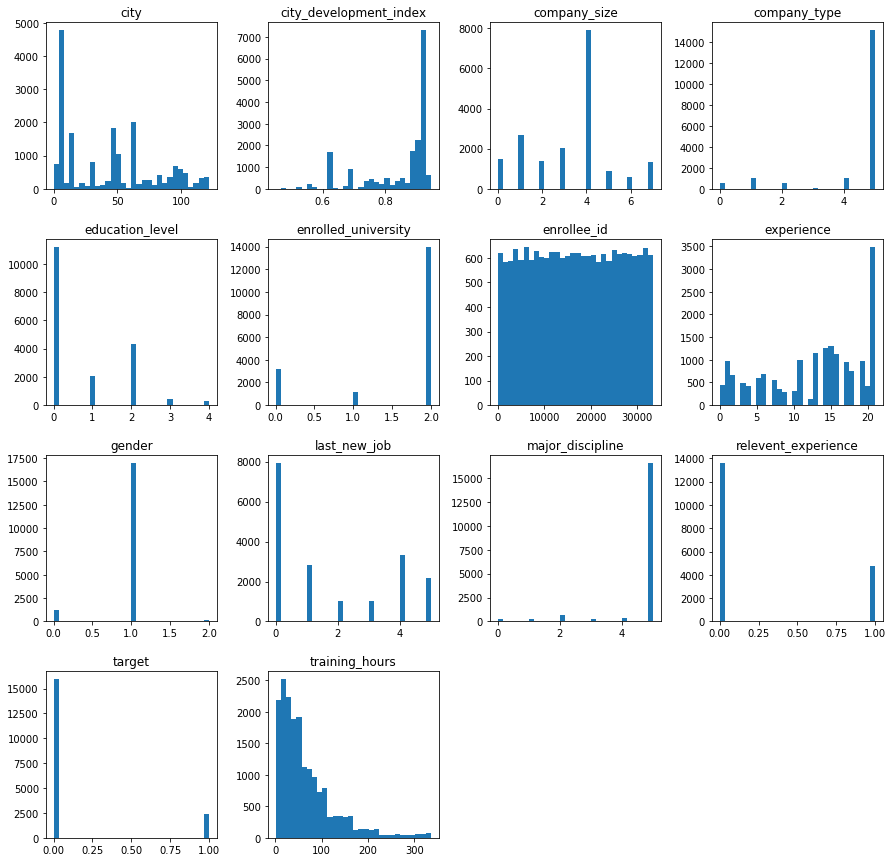

In [12]:
df.hist(bins=30,figsize=(15,15),grid=False)

In [13]:
corr_matrix = df.corr()
corr_matrix = corr_matrix.where(np.tril(np.ones(corr_matrix.shape)).astype(np.bool))

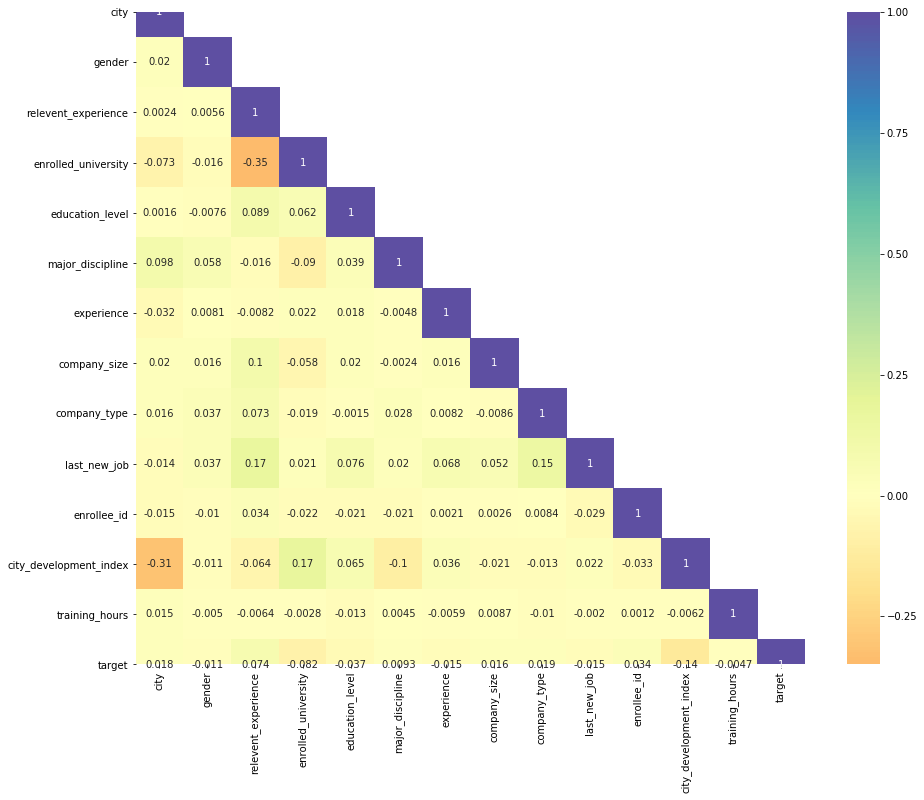

In [14]:
plt.figure(figsize=(15,12))
sns.heatmap(corr_matrix, annot=True, center=0, cmap="Spectral")

In [15]:
corr_matrix['target'].sort_values(ascending=False)

target                    1.0
city                      NaN
gender                    NaN
relevent_experience       NaN
enrolled_university       NaN
education_level           NaN
major_discipline          NaN
experience                NaN
company_size              NaN
company_type              NaN
last_new_job              NaN
enrollee_id               NaN
city_development_index    NaN
training_hours            NaN
Name: target, dtype: float64

### Data Modelling

In [16]:
from sklearn import preprocessing
from sklearn.preprocessing import normalize

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [18]:
X = df.drop('target',1) 
y = df.target

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state= 50)

In [20]:
#min_max_scaler = preprocessing.MinMaxScaler()
#np_scaled = min_max_scaler.fit_transform(X_train)
#X_train = pd.DataFrame(np_scaled)

In [21]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14687 entries, 8710 to 14000
Data columns (total 13 columns):
city                      14687 non-null int64
gender                    14687 non-null int64
relevent_experience       14687 non-null int64
enrolled_university       14687 non-null int64
education_level           14687 non-null int64
major_discipline          14687 non-null int64
experience                14687 non-null int64
company_size              14687 non-null int64
company_type              14687 non-null int64
last_new_job              14687 non-null int64
enrollee_id               14687 non-null int64
city_development_index    14687 non-null float64
training_hours            14687 non-null int64
dtypes: float64(1), int64(12)
memory usage: 1.6 MB


In [22]:
print('X Train' , X_train.shape)
print('X Test' , X_test.shape)
print('y Train' , y_train.shape)
print('y Test' , y_test.shape)

X Train (14687, 13)
X Test (3672, 13)
y Train (14687,)
y Test (3672,)


In [23]:
estimator=LogisticRegression()
estimator.fit(X_train,y_train)
# Predict on the test data
ypred = estimator.predict(X_test)
Log_acc = accuracy_score(y_test,ypred)
Log_acc

0.8589324618736384

In [24]:
estimator=RandomForestClassifier(n_estimators=100)
estimator.fit(X_train,y_train)
# Predict on the test data
ypred = estimator.predict(X_test)
rf_acc = accuracy_score(y_test,ypred)
rf_acc

0.8559368191721133

In [25]:
estimator=DecisionTreeClassifier()
estimator.fit(X_train,y_train)
# Predict on the test data
ypred = estimator.predict(X_test)
dtc_acc = accuracy_score(y_test,ypred)
dtc_acc

0.7587145969498911

In [26]:
estimator=SGDClassifier()
estimator.fit(X_train,y_train)
# Predict on the test data
ypred = estimator.predict(X_test)
sgd_acc = accuracy_score(y_test,ypred)
sgd_acc

0.8586601307189542

In [27]:
estimator=SVC()
estimator.fit(X_train,y_train)
# Predict on the test data
ypred = estimator.predict(X_test)
svc_acc = accuracy_score(y_test,ypred)
svc_acc

0.8589324618736384

In [28]:
estimator=LinearSVC()
estimator.fit(X_train,y_train)
# Predict on the test data
ypred = estimator.predict(X_test)
lsvc_acc = accuracy_score(y_test,ypred)
lsvc_acc

0.8583877995642701

In [29]:
estimator=GaussianNB()
estimator.fit(X_train,y_train)
# Predict on the test data
ypred = estimator.predict(X_test)
gnb_acc = accuracy_score(y_test,ypred)
gnb_acc

0.8589324618736384

In [30]:
estimator=KNeighborsClassifier()
estimator.fit(X_train,y_train)
# Predict on the test data
ypred = estimator.predict(X_test)
knn_acc = accuracy_score(y_test,ypred)
knn_acc

0.8420479302832244

### Scores of all Predictions

In [31]:
models = pd.DataFrame({
        'Model': ['Logistic Regression', 'Random Forest','Decision Tree','Stochastic Gradient Descent',
                  'Support Vector Machines','Linear SVC','Naive Bayes','KNN'],
        'Score': [Log_acc, rf_acc, dtc_acc, sgd_acc, svc_acc, lsvc_acc, gnb_acc, knn_acc]
    })
models.sort_values(by='Score', ascending=False)

,Model,Score
0,Logistic Regression,0.858932
4,Support Vector Machines,0.858932
6,Naive Bayes,0.858932
3,Stochastic Gradient Descent,0.858660
5,Linear SVC,0.858388
1,Random Forest,0.855937
7,KNN,0.842048
2,Decision Tree,0.758715


In [32]:
from sklearn.metrics import f1_score, confusion_matrix, classification_report
from sklearn import metrics

In [33]:
# Measure accuracy and model score
matrix = confusion_matrix(y_test, ypred)
score = f1_score(y_test, ypred, average='micro')
report = classification_report(y_test, ypred)
print('Model Score: ', score)
print('Model Matrix:\n', matrix)
print('Model Report:\n', report)

Model Score:  0.8420479302832243
Model Matrix:
 [[3077   77]
 [ 503   15]]
Model Report:
               precision    recall  f1-score   support

           0       0.86      0.98      0.91      3154
           1       0.16      0.03      0.05       518

    accuracy                           0.84      3672
   macro avg       0.51      0.50      0.48      3672
weighted avg       0.76      0.84      0.79      3672



In [34]:
from sklearn.metrics import roc_auc_score

In [35]:
auc_roc=roc_auc_score(y_test,ypred)
auc_roc

0.502272042855429

### Test data handeling

In [122]:
#import data
test = pd.read_csv('C:/Users/SiviSoft/Desktop/Bala/AV/HR Analytics/test.csv', header=0)

In [123]:
test.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,16548,city_33,0.448,NaN,No relevent experience,Full time course,Graduate,STEM,<1,1000-4999,Public Sector,NaN,15
1,12036,city_28,0.939,Male,No relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,1,94
2,11061,city_103,0.920,Male,No relevent experience,Full time course,Graduate,STEM,3,NaN,NaN,1,17
3,5032,city_104,0.924,Male,No relevent experience,no_enrollment,Phd,STEM,>20,50-99,Pvt Ltd,2,76
4,17599,city_77,0.830,Male,Has relevent experience,no_enrollment,Graduate,STEM,6,<10,Pvt Ltd,2,65


In [124]:
test['gender'].fillna(test['gender'].mode()[0], inplace=True) 
test['enrolled_university'].fillna(test['enrolled_university'].mode()[0], inplace=True)
test['education_level'].fillna(test['education_level'].mode()[0], inplace=True)
test['major_discipline'].fillna(test['major_discipline'].mode()[0], inplace=True)
test['experience'].fillna(test['experience'].mode()[0], inplace=True)
test['company_size'].fillna(test['company_size'].mode()[0], inplace=True)
test['company_type'].fillna(test['company_type'].mode()[0], inplace=True)
test['last_new_job'].fillna(test['last_new_job'].mode()[0], inplace=True)

In [125]:
test_obj=test.select_dtypes(include='object')
test_num=test.select_dtypes(include=['int64','float64'])

In [126]:
odr = OrdinalEncoder()
test_obj[:] = odr.fit_transform(test_obj[:])

In [127]:
df=pd.concat([test_obj,test_num],axis=1)

In [128]:
test_predictions = estimator.predict(df)

In [129]:
enrollee_id = test['enrollee_id']

In [130]:
submission_df_1 = pd.DataFrame({
                  "enrollee_id": enrollee_id, 
                  "target": test_predictions})

In [131]:
submission_df_1.to_csv('C:/Users/SiviSoft/Desktop/Bala/AV/HR Analytics/submission_HR(log_r3).csv', index=False)